## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [ ]:
# If you didn't download it yet, please get the relevant file now!
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.


In [2]:
import pandas as pd

file_name="data_000637.txt"
df=pd.read_csv(file_name)
print("Inital df length", len(df))
df_=df[:int(len(df)/2)]
print("Final df length", len(df_))
df_.head()

Inital df length 1310720
Final df length 655360


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25


2\. Find out the number of BX in a ORBIT (the value 'x').

In [3]:
import numpy as np

x = np.max(df['BX_COUNTER'])-np.min(df['BX_COUNTER'])+1
print("The ORBIT_CNT is increased every %2.i BX_COUNTER"%(x))

The ORBIT_CNT is increased every 3564 BX_COUNTER


3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

In [4]:
# sort the whole dataset
df.sort_values(['ORBIT_CNT', 'BX_COUNTER', 'TDC_MEAS'], ignore_index=True)

# add a time column with time information in ns
df['T0']=df['ORBIT_CNT']*x*25+df['BX_COUNTER']*25+df['TDC_MEAS']*25/30

# data taking time = last_measure time - first_measure time
tot_time = df['T0'].iloc[-1]-df['T0'].iloc[0]
print("The data taking lasted", tot_time, "ns, i.e.", tot_time*1e-9, "s")

The data taking lasted 980416093.3125 ns, i.e. 0.9804160933125 s


4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [4]:
df.head()

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,T0
0,1,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,1,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14


5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

In [10]:
df['HEAD'] = np.random.randint(0, 2, len(df))
#df.head()
df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,T0
0,0,0,123,3869200167,2374,26,3.447457e+14
1,0,0,124,3869200167,2374,27,3.447457e+14
2,0,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,0,0,64,3869200167,2760,25,3.447457e+14
...,...,...,...,...,...,...,...
1310715,0,0,62,3869211171,762,14,3.447467e+14
1310716,1,1,4,3869211171,763,11,3.447467e+14
1310717,0,0,64,3869211171,764,0,3.447467e+14
1310718,1,0,139,3869211171,769,0,3.447467e+14


6\. Create a new DataFrame that contains only the rows with HEAD=1.

In [6]:
df_ = df[df['HEAD']==1]
df_.head()

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,T0
0,1,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
5,1,0,63,3869200167,2762,4,3.447457e+14
6,1,0,61,3869200167,2772,14,3.447457e+14
7,1,0,139,3869200167,2776,0,3.447457e+14


7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

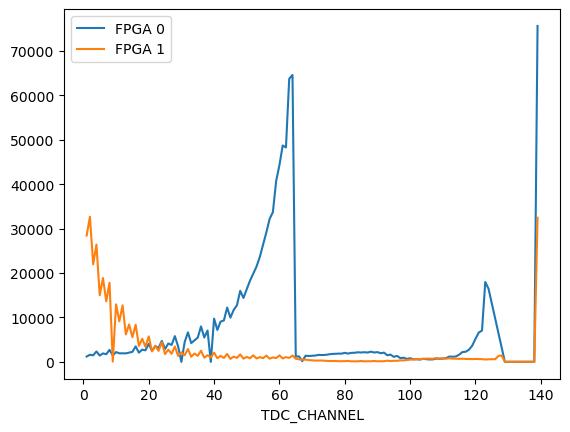

In [7]:
import matplotlib.pyplot as plt

df[df['FPGA']==0].groupby('TDC_CHANNEL').count().iloc[:,0].plot(label = "FPGA 0")
df[df['FPGA']==1].groupby('TDC_CHANNEL').count().iloc[:,0].plot(label = "FPGA 1")
plt.legend()
plt.show()

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

In [8]:
df_ = df[df['FPGA']==0].groupby('TDC_CHANNEL', as_index=False).count()
df_ = df_.loc[:,['TDC_CHANNEL','HEAD']]
df_.columns = ['TDC_CHANNEL','COUNTS']
df_.sort_values(['COUNTS'], ascending=False, inplace=True, ignore_index=True)
df_[:3]

,TDC_CHANNEL,COUNTS
0,139,75617
1,64,64581
2,63,63724


9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [9]:
print("Number of unique orbits:", df['ORBIT_CNT'].nunique())
print("Number of unique orbits with at least one measurement from TDC_CH = 139:", df[df['TDC_CHANNEL']==139]['ORBIT_CNT'].nunique())

Number of unique orbits: 11001
Number of unique orbits with at least one measurement from TDC_CH = 139: 10976
